In [2]:
import pandas as pd
import csv
from datetime import datetime as dt
from datetime import date, time
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Load data (this one is boylston)
df = pd.read_csv("Dailytemp1.csv")
#Drop unnecessary index columns and make datetime into an index
df = df.drop(df.columns[[0]], axis = 1)
df = df.set_index("datetime")
 



In [4]:
#split data, its important to split data when it indexed as date
x = df.iloc[:,1:5]
y = df.iloc[:,0]

In [9]:
y

datetime
2019-01-01     88.027
2019-01-02    102.371
2019-01-03     99.489
2019-01-04     95.921
2019-01-05     93.018
               ...   
2022-09-01    101.068
2022-09-02     93.182
2022-09-03     90.658
2022-09-04     96.531
2022-09-05     95.572
Name: Value, Length: 1344, dtype: float64

In [10]:
x

,TAVG,Year,Month,Day
datetime,,,,
2019-01-01,47,2019,1,1
2019-01-02,33,2019,1,2
2019-01-03,38,2019,1,3
2019-01-04,40,2019,1,4
2019-01-05,41,2019,1,5
...,...,...,...,...
2022-09-01,74,2022,9,1
2022-09-02,65,2022,9,2
2022-09-03,66,2022,9,3


In [38]:
#Test size is 20% of our data size (1345 * 0.2)
test_size = 269

#x[from beginning:to the the first of test size]
x_train = x[:-test_size]
y_train = y[:-test_size]
x_test = x[-test_size:]
y_test = y[-test_size:]

In [42]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train, y_train)

LinearRegression()

In [45]:
#test against our testing set
y_prediction =  LR.predict(x_test)
y_prediction

array([ 93.07216875,  93.78339711,  93.2580585 ,  93.61598201,
        93.00231719,  94.33182903,  94.68975254,  93.54613045,
        93.19744427,  92.40712703,  93.2950078 ,  93.74125753,
        93.12759271,  92.77890653,  93.31348246,  93.84805839,
        93.67602463,  94.12227435,  94.48019786,  94.57314273,
        94.84274003,  97.79344997,  97.79806863,  96.47779412,
        96.04078172,  97.37029356,  97.72821707,  97.02622604,
        96.50088743,  97.21211579,  97.48171309,  96.07311237,
        96.69601451,  98.02552635,  98.20679743,  96.17991323,
        96.27285811,  98.66228448,  98.04861966,  98.05323832,
        98.76446668,  97.17921354,  97.27215841,  97.98338677,
        98.34131027,  98.87588621,  98.26222139,  97.64855657,
        98.80141598,  98.36440359,  97.75073877,  98.37364092,
        95.69180587,  96.57968665,  97.11426258,  96.67725019,
        95.71028053,  95.44992056,  96.51445376,  97.49066075,
        97.31862699,  97.6765505 ,  98.03447401,  98.74

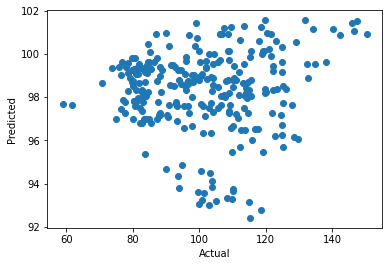

In [47]:
#there should be diagonal trend as actual increases so should predicted
plt.scatter(y_test, y_prediction);
plt.xlabel('Actual');
plt.ylabel('Predicted');


In [48]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  -0.029871206354716406
mean_sqrd_error is== 290.9864862206579
root_mean_squared error of is== 17.058326008745933


In [49]:
#Now that the model is trained we move to prediciting section
#We must make a file that extentends into the future with dates and TAVG
#Make it in excel, call it newinput2.csv

In [55]:
#Read the newinput data
newinput = pd.read_csv("newinput2.csv")
#It is important to conver it into date-indexed 
newinput = newinput.set_index("datetime")

In [62]:
#place new data into the model 
y_prediction1=  LR.predict(newinput)
y_prediction1

array([ 97.16708726,  97.34835835,  97.79460807,  97.62257431,
        97.80384539,  98.60339996,  98.16638757,  97.55272275,
        97.73399384,  98.79852704,  98.62649328,  98.18948088,
        98.01744712,  97.84541336,  98.46831551,  99.35619628,
        99.53746737,  99.98371709,  99.72335712,  99.02136609,
        99.3792896 ,  99.20725584,  99.56517935,  99.83477665,
        98.95613319,  96.1905906 ,  97.07847138,  95.66987066,
        95.93946796,  95.50245556,  96.12535771,  97.71984818,
        96.84120473,  96.58084476,  96.49713721,  96.59008208,
        96.68302696,  97.04095047,  97.04556913,  97.138514  ,
        96.87815403,  97.23607754,  97.15236999,  96.98033623,
        97.16160732,  97.69618325,  97.52414949,  98.14705163,
        98.06334409,  98.06796275,  97.9842552 ,  97.81222144,
        97.90516632,  98.0864374 ,  98.62101333,  99.24391548,
        95.85547074,  94.44687002,  94.89311974,  94.89773841,
        95.34398813,  95.436933  ,  95.35322545,  94.47

In [58]:
#make a data frame out of the input dates use that as x in the plot and use y_predict as y

In [92]:
date = pd.read_csv("newinput2.csv")
date = date.drop(date.columns[[1,2,3,4]], axis = 1)
date['datetime'] = pd.to_datetime(date['datetime'])

(array([19266., 19358., 19448., 19539., 19631., 19723., 19814., 19905.,
        19997., 20089.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

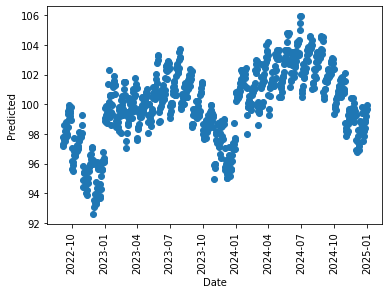

In [106]:
plt.scatter(date, y_prediction1);
plt.ylabel('Predicted');
plt.xlabel('Date');
plt.xticks(rotation='vertical')


In [88]:
#now its time to graph actual, take the dates from training set same range and take actual loads in excel call it actualinput.csv


In [107]:
actualinput = pd.read_csv("actualinput.csv")
actualinput

In [134]:
#put y_predicition into a variable, and use pd to make it a dataframe save it as csv, append that data into actualinput.csv column for graphing purposes
array = y_prediction1
actual = pd.DataFrame(array)
actual.to_csv("predicted.csv")

In [ ]:
#dont worry about this
#actual1 = actual.insert(0, 'datetime', date)

In [137]:
predicted = pd.read_csv("actualinput.csv")
predicted

,datetime,Value
0,1/1/2019,88.027000
1,1/2/2019,102.371000
2,1/3/2019,99.489000
3,1/4/2019,95.921000
4,1/5/2019,93.018000
...,...,...
2187,12/27/2024,98.774323
2188,12/28/2024,99.220573
2189,12/29/2024,99.578496
2190,12/30/2024,99.671441


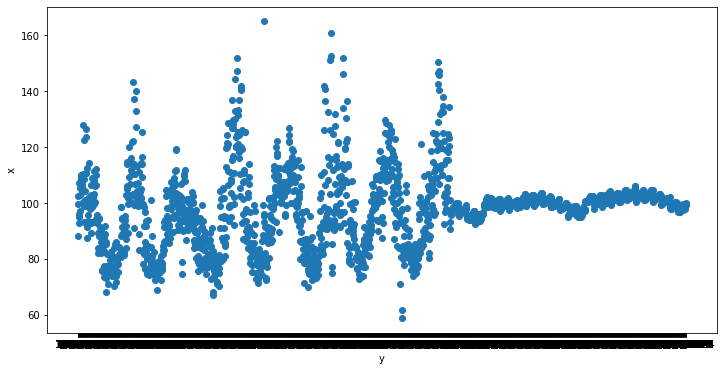

In [144]:
fig = plt.subplots(figsize=(12, 6))
plt.scatter(predicted["datetime"], predicted["Value"] );
plt.ylabel('x');
plt.xlabel('y');
#plt.xticks(np.arange(0, len(x)+1, 5))